# DTSA 5510 Final Project

## Imports

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split

## Data import

In [2]:
reviews = pd.read_csv('data/reviews.csv')

In [3]:
reviews.head()

,ID,REVIEW_DATE,IS_VERIFIED,RATING,REVIEW_TITLE,REVIEW_TEXT,NAME
0,3129911,2022-08-17,True,1,This has NO flavor,"This item has no flavor, several people have t...",United States
1,2702184,2022-06-07,True,1,Different formula,I have used this brand of sunscreen for about ...,United States
2,760128,2014-06-03,True,5,Vitex!!!,Have been using these for at least 20 months a...,United States
3,760140,2013-11-24,True,5,Stopping hair loss,Bought this to help fight hair loss along with...,United States
4,760132,2014-04-10,True,5,coming off of birth control,this company is one of the best most honest i'...,United States


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            10000 non-null  int64 
 1   REVIEW_DATE   10000 non-null  object
 2   IS_VERIFIED   10000 non-null  bool  
 3   RATING        10000 non-null  int64 
 4   REVIEW_TITLE  9999 non-null   object
 5   REVIEW_TEXT   10000 non-null  object
 6   NAME          10000 non-null  object
dtypes: bool(1), int64(2), object(4)
memory usage: 478.6+ KB


### Changing NAME field to Country

In [5]:
reviews.rename(columns={'NAME': 'COUNTRY'}, inplace = True)

### Dropping the row with the one null value

In [6]:
reviews[reviews['REVIEW_TITLE'].isnull()]

,ID,REVIEW_DATE,IS_VERIFIED,RATING,REVIEW_TITLE,REVIEW_TEXT,COUNTRY
2517,3566087,2018-08-09,True,5,NaN,Excellent product that is really helping my dog,United States


In [7]:
reviews.dropna(subset = ['REVIEW_TITLE'], axis = 0, inplace = True)

In [8]:
reviews.isnull().sum()

ID              0
REVIEW_DATE     0
IS_VERIFIED     0
RATING          0
REVIEW_TITLE    0
REVIEW_TEXT     0
COUNTRY         0
dtype: int64

In [9]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            9999 non-null   int64 
 1   REVIEW_DATE   9999 non-null   object
 2   IS_VERIFIED   9999 non-null   bool  
 3   RATING        9999 non-null   int64 
 4   REVIEW_TITLE  9999 non-null   object
 5   REVIEW_TEXT   9999 non-null   object
 6   COUNTRY       9999 non-null   object
dtypes: bool(1), int64(2), object(4)
memory usage: 556.6+ KB


### Converting REVIEW_DATE field to pandas datetime

In [10]:
reviews.head()

,ID,REVIEW_DATE,IS_VERIFIED,RATING,REVIEW_TITLE,REVIEW_TEXT,COUNTRY
0,3129911,2022-08-17,True,1,This has NO flavor,"This item has no flavor, several people have t...",United States
1,2702184,2022-06-07,True,1,Different formula,I have used this brand of sunscreen for about ...,United States
2,760128,2014-06-03,True,5,Vitex!!!,Have been using these for at least 20 months a...,United States
3,760140,2013-11-24,True,5,Stopping hair loss,Bought this to help fight hair loss along with...,United States
4,760132,2014-04-10,True,5,coming off of birth control,this company is one of the best most honest i'...,United States


In [11]:
reviews['REVIEW_DATE'] = pd.to_datetime(reviews['REVIEW_DATE'])

### Converting ID field to type object

In [12]:
reviews['ID'] = reviews['ID'].astype(object)

In [13]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9999 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   ID            9999 non-null   object        
 1   REVIEW_DATE   9999 non-null   datetime64[ns]
 2   IS_VERIFIED   9999 non-null   bool          
 3   RATING        9999 non-null   int64         
 4   REVIEW_TITLE  9999 non-null   object        
 5   REVIEW_TEXT   9999 non-null   object        
 6   COUNTRY       9999 non-null   object        
dtypes: bool(1), datetime64[ns](1), int64(1), object(4)
memory usage: 556.6+ KB


In [14]:
reviews.describe()

,REVIEW_DATE,RATING
count,9999,9999.000000
mean,2019-05-12 18:08:27.650765056,3.708071
min,2000-06-17 00:00:00,1.000000
25%,2016-11-07 00:00:00,2.000000
50%,2020-01-06 00:00:00,5.000000
75%,2022-08-11 00:00:00,5.000000
max,2024-06-17 00:00:00,5.000000
std,NaN,1.625120


## Visualizations

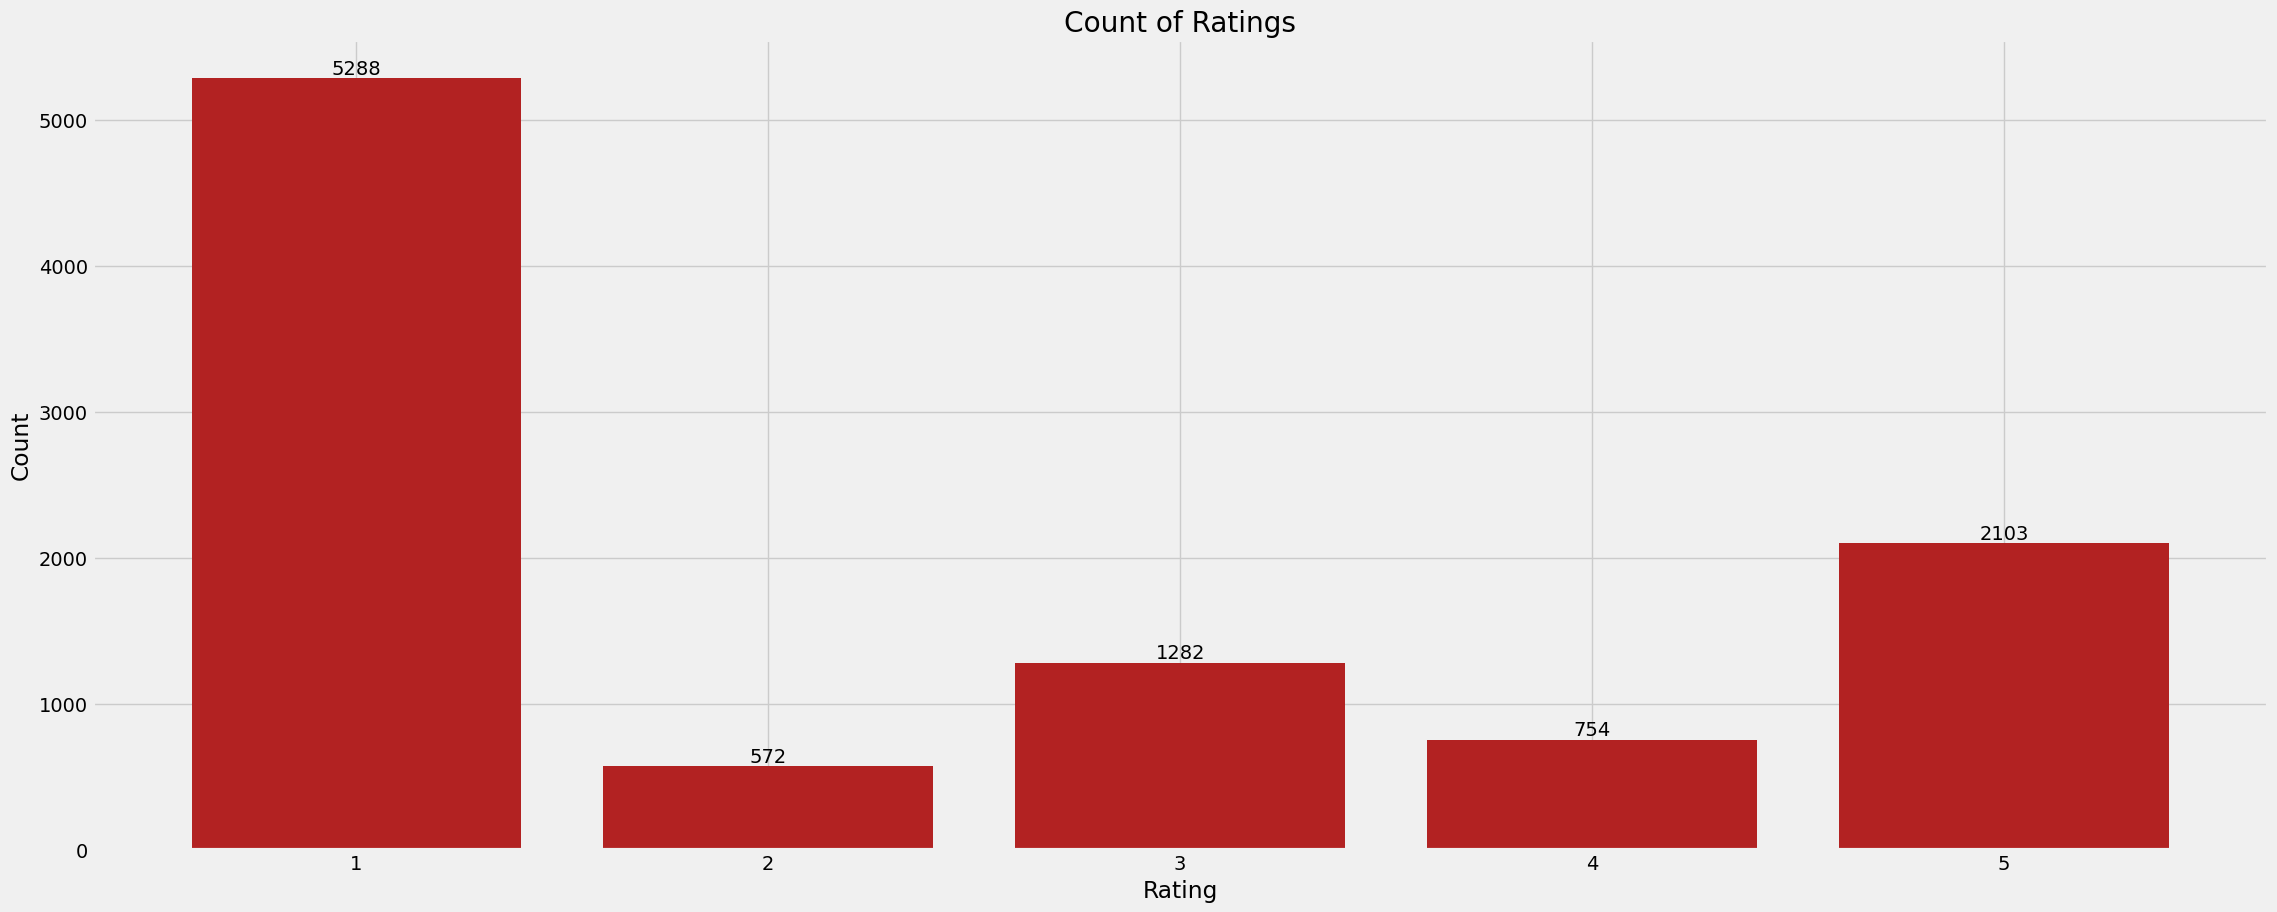

In [15]:
plt.style.use('fivethirtyeight')
fix, ax = plt.subplots(figsize = (25, 10))

ratings = reviews['RATING'].value_counts()
ind = reviews['RATING'].unique()

plt.bar(ind, ratings, color = 'firebrick', align = 'center')

for p in ax.patches:
    ax.text(p.get_x() + p.get_width() / 2,
            p.get_height(),
            '{:.0f}'.format(p.get_height()),
            ha='center',
            va='bottom'
           )

plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [ ]:
# dataset is unbalanced, but that is ok in our context as we will not be exploring the relationship between variables, just the underlying text

In [19]:
reviews.head()

,ID,REVIEW_DATE,IS_VERIFIED,RATING,REVIEW_TITLE,REVIEW_TEXT,COUNTRY
0,3129911,2022-08-17,True,1,This has NO flavor,"This item has no flavor, several people have t...",United States
1,2702184,2022-06-07,True,1,Different formula,I have used this brand of sunscreen for about ...,United States
2,760128,2014-06-03,True,5,Vitex!!!,Have been using these for at least 20 months a...,United States
3,760140,2013-11-24,True,5,Stopping hair loss,Bought this to help fight hair loss along with...,United States
4,760132,2014-04-10,True,5,coming off of birth control,this company is one of the best most honest i'...,United States


In [22]:
reviews['word_count'] = reviews['REVIEW_TEXT'].apply(lambda x: len(x.split()))

Text(0.5, 1.0, 'Number of words by review histogram')

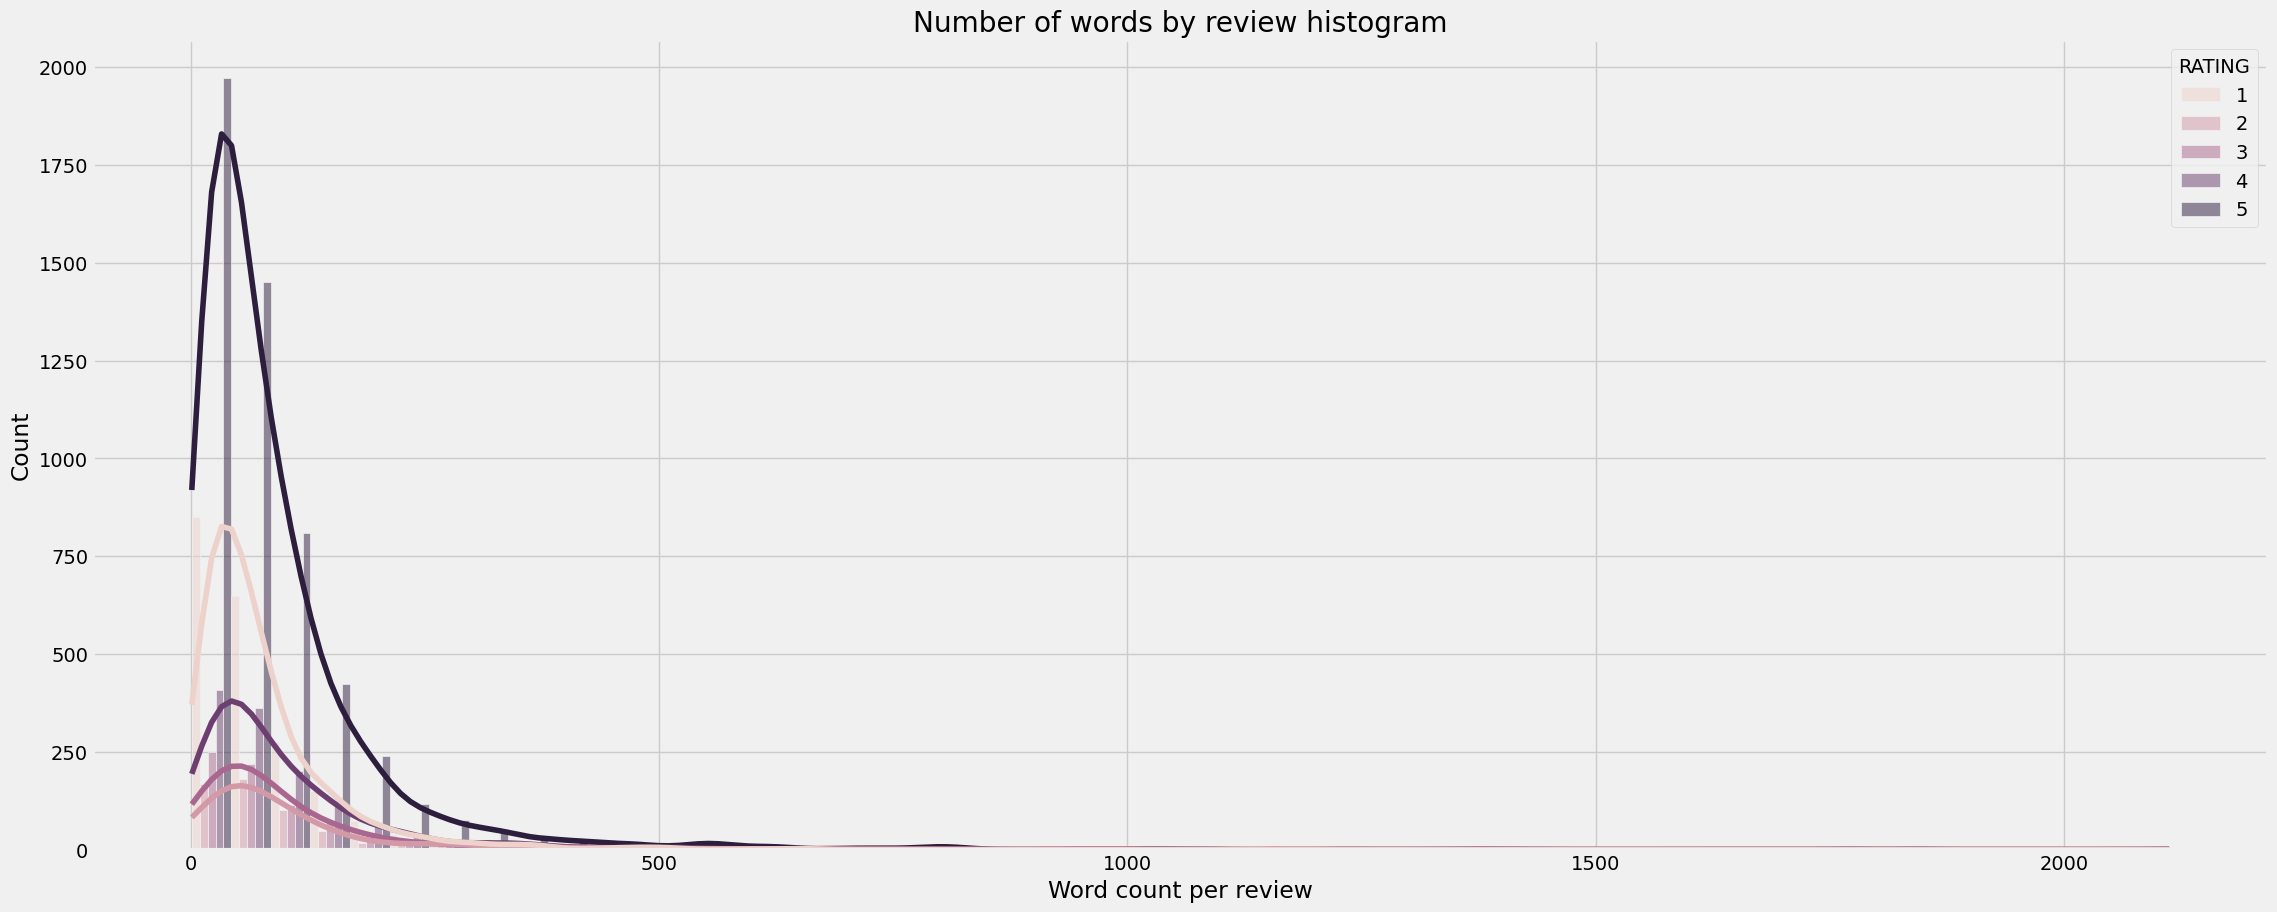

In [27]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (25, 10))

sns.histplot(data=reviews, x='word_count', hue='RATING', multiple='dodge', legend='RATING', kde = True, bins = 50)

plt.xlabel('Word count per review')
plt.ylabel('Count')
plt.title('Number of words by review histogram')

RATING
1    [38, 92, 121, 15, 20, 28, 84, 65, 46, 258, 34,...
2    [137, 142, 33, 65, 12, 6, 86, 29, 40, 49, 17, ...
3    [79, 167, 406, 533, 70, 61, 26, 11, 153, 88, 3...
4    [98, 211, 132, 37, 108, 32, 99, 320, 253, 71, ...
5    [31, 35, 28, 148, 21, 47, 2, 101, 5, 77, 188, ...
Name: word_count, dtype: object
[[38, 92, 121, 15, 20, 28, 84, 65, 46, 258, 34, 9, 178, 16, 155, 50, 2, 55, 6, 48, 17, 37, 67, 36, 29, 67, 57, 92, 23, 43, 102, 112, 25, 202, 295, 66, 109, 127, 74, 3, 30, 21, 20, 35, 57, 24, 69, 59, 65, 97, 84, 38, 56, 69, 20, 99, 52, 3, 62, 153, 115, 12, 235, 41, 106, 65, 380, 5, 44, 160, 20, 92, 136, 82, 103, 22, 41, 67, 47, 74, 43, 47, 1, 73, 46, 70, 34, 43, 120, 98, 88, 18, 84, 41, 78, 64, 25, 46, 48, 85, 65, 60, 24, 78, 71, 9, 89, 76, 22, 6, 53, 22, 22, 131, 91, 52, 298, 30, 76, 59, 33, 60, 107, 12, 99, 7, 36, 54, 29, 16, 90, 121, 26, 54, 387, 127, 150, 77, 18, 108, 35, 42, 45, 35, 41, 29, 249, 199, 326, 206, 18, 46, 58, 184, 140, 134, 62, 36, 38, 44, 63, 30, 13, 362, 14,

/var/folders/lr/994tkpld58q9sbf0jsds90h80000gn/T/ipykernel_64255/174630074.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(data, labels = reviews['RATING'].unique(), patch_artist=True)


Text(0, 0.5, 'Word count')

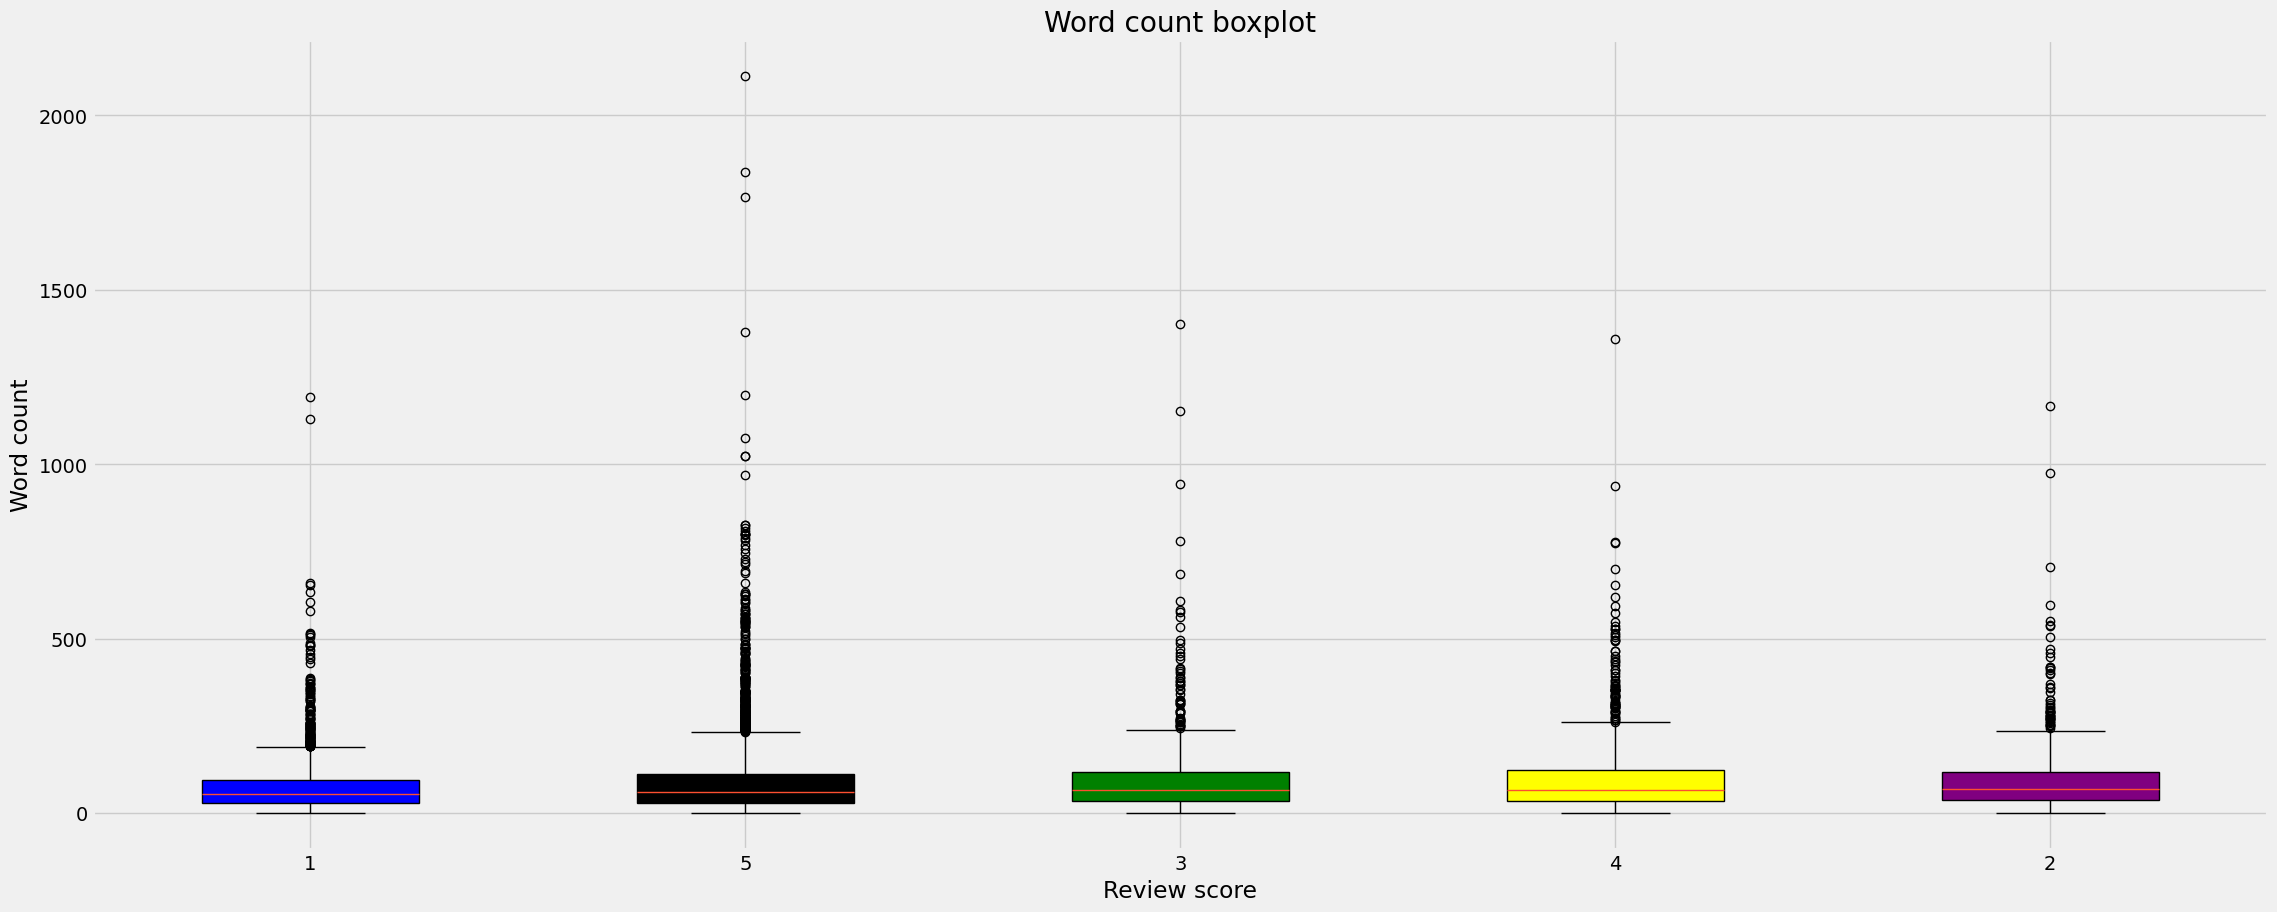

In [30]:
plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize = (25, 10))

wc_group = reviews.groupby('RATING')['word_count'].apply(list)
data = [wc_group[cat] for cat in reviews['RATING'].unique()]

bp = plt.boxplot(data, labels = reviews['RATING'].unique(), patch_artist=True)

colors = ['blue', 'black', 'green', 'yellow', 'purple']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)

plt.title('Word count boxplot')
plt.xlabel('Review score')
plt.ylabel('Word count')

# Train Test Split

In [34]:
reviews.sample(5)

,ID,REVIEW_DATE,IS_VERIFIED,RATING,REVIEW_TITLE,REVIEW_TEXT,COUNTRY,word_count
5101,8074265,2022-09-05,True,1,Malfunctioned right out of the box,I bought 2 sets of these to add a decorative e...,United Arab Emirates,174
4958,8762652,2023-12-21,True,5,This really works,I noticed alot of hair in the drain after sham...,United States,45
6643,4528939,2023-02-13,True,4,The product is very good in all .,I am a subscribe and save customer so I receiv...,United States,34
2553,7423909,2021-05-18,True,5,Pretty awesome,"It's really easy to install, and it's fast. I""...",United States,240
179,4182566,2023-01-29,True,1,Utterly disappointing from a brand that I know...,Steer clear of the Canon G7020! It worked fine...,United States,127


In [35]:
reviews_train, reviews_test = train_test_split(reviews, test_size=0.20, random_state=42)

In [39]:
len(reviews_train)

7999

In [38]:
len(reviews_test)

2000